# HW2  Regression Fun Time!
**Abby Irish, CS74, Winter 2025**

Please run the cell below to import libraries needed for this HW. Please use the autograd numpy, otherwise you will have issues.

In [67]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Q1) **[10 points]**

Implement the linear regression model discussed in class below. The function (called model) takes in an array of data points, x , and an array of weights, w, and returns a vector y_predicted containing the linear combination for each of the data points. This is the linear model we have discussed in class. You can assume each data point in x only has one feature.  The length of the vector being returned should be the same as x.


In [17]:
# linear regression model takes in array of data points, x, and array of weights, w.
def model(x,w): 
    y_predicted = w[0] + w[1] * x   # y_predicted = linear combination for each data point, assuming each data point in x has only 1 feature
    return y_predicted  

Q2) **[10 ponts]**

Implement the least squares function discussed in class below. The function should take in an array of weights, w, an array of x's and an array of ys. It should use the model function implemented above and return a float indicating the total cost.

In [18]:
# least squares function implementation
def least_squares(w, x, y):
    y_predicted = model(x, w) # call model function from above
    error = y_predicted - y # calculate error
    cost = np.mean(np.square(error)) # calculare cost
    return cost

Q3) **[5 point]**

This one is a freebie from HW1. Copy and paste your gradient descent function here. Specifically, the one that takes in the cost function as input and return the weight and cost history. We will be using a fixed alpha for this HW. The only difference is that this function should now also take in as input an array of x and ys, corresponding to our data. The w,x, and y are given as inputs to the cost funtion and its gradient.

In [19]:
# gradient descent function
def gradient_descent(g, alpha, max_its, w, x, y):
    gradient = grad(g)   # use the autograd library to find the gradient of a function
    
    weight_history = [w] # list to store weights
    cost_history  = [g(w, x, y)] # list to store costs

    for k in range(max_its):
        grad_w = gradient(w, x, y) # compute gradient

        w = w - alpha * grad_w

        cost = g(w, x, y) # compute cost
        
        # Store history
        weight_history.append(w)
        cost_history.append(cost)
        
    return weight_history,cost_history

Q4) **[1 points]**  
Run the code below to import a dataset. Then, plot a scatter plot of the data (x vs y).

In [29]:
# import the dataset
## Carefully check the path
csvname = 'kleibers_law_data.csv'
data = np.loadtxt(csvname, delimiter=',')
x = np.log(data[:-1,:])
y = np.log(data[-1:,:])

<function matplotlib.pyplot.show(close=None, block=None)>

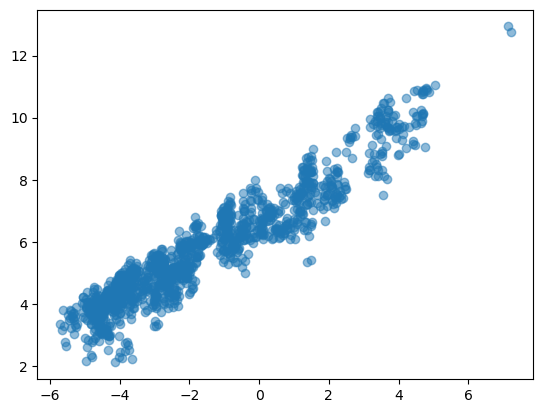

In [30]:
# plot the data points
plt.scatter(x, y, alpha=.5)
plt.show

Q5) **[10 points]**

[Part 1] Use your gradient descent function to learn a linear regression model for the x and y above using the following parameters and plot the cost_history over the 1000 iterations

g = least_squares function you implemented

w = [w_0, w_1]  , where w_0 and w_1 are random numbers between -0.1 and 0.1

max_its=1000

alpha=0.01

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


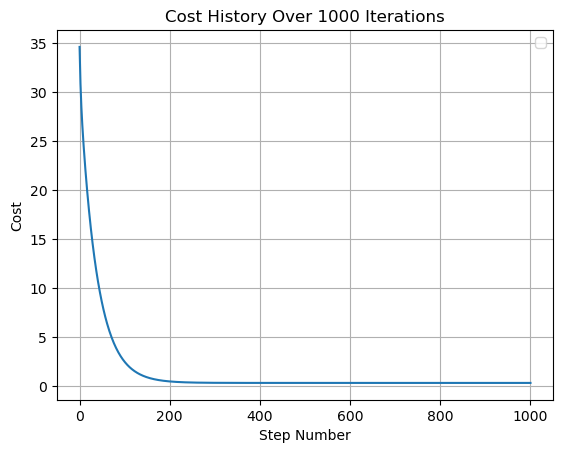

In [31]:
# define w
w = np.random.uniform(-0.1, 0.1, 2)

# run gradient descent function
weight_history, cost_history = gradient_descent(g=least_squares, alpha=0.01, max_its=1000, w=w, x=x, y=y)

# plot cost history over 1000 iterations
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Step Number")
plt.ylabel("Cost")
plt.title("Cost History Over 1000 Iterations")
plt.legend()
plt.grid()
plt.show()

Q5) [Part 2]

Use the learned weights from above (note that the "learned" weights are the ones with the lowest cost) to plot the learned line. You can use the linspace method (shown below) to generate a list of xs that you can use for plotting. You need to generate a y for each of the candidate xs using the learned weights. On the same figure, also plot the scatter plot from Q4.


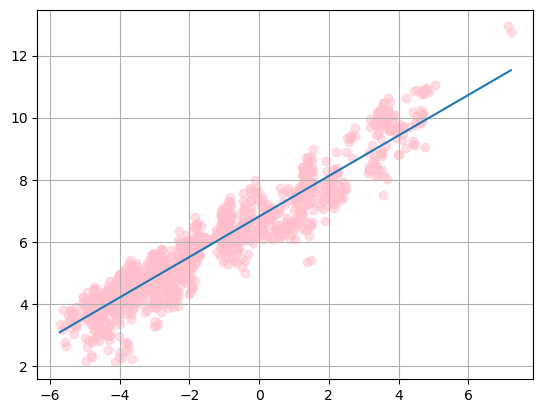

In [32]:
# use learned weights to plot learned line
s = np.linspace(np.min(x),np.max(x)) # generate list of xs
ys = model(s, weight_history[-1]) # generate a y for each x using learned weights

# plot scatter plot and and learned line
plt.scatter(x, y, color='pink', alpha=.5)
plt.plot(s, ys)
plt.grid()
plt.show()

Q6) **[1 points]**  

Run the code below to import a dataset. Then, plot a scatter plot of the data (x vs y).

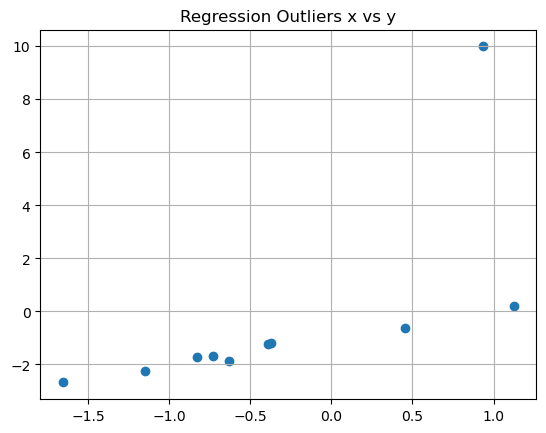

In [34]:
# load in dataset
data = np.loadtxt('regression_outliers.csv',delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]

# scatter plot of data points
plt.scatter(x, y)
plt.title("Regression Outliers x vs y")
plt.grid()
plt.show()

Q7) **[10 ponts]**

 Implement the least absolute deviations function discussed in class. The function should take in an array of weights, w, an array of x's and an array of ys. It should use the model function implemented in Q1  and return a float indicating the total cost.

In [35]:
# least absolute deviations function
def least_absolute_deviations(w, x, y): 
    y_prediction = model(x, w)
    error = y_prediction - y
    cost = np.mean(np.abs(error))
    
    return cost

 Q8) **[10 points]**

[Part 1] Use the gradient descent function twice to learn two linear models using the new x and y from Q6 using the following parameters and plot the cost_history for both runs on the same plot. Make the plot for the first run blue and the plot for the second run red.

Run 1)
g = least_squares function

w = [1.0,1.0]

max_its=100

alpha=0.1

Run 2)
g = least_absoulte_deviations

w = [1.0,1.0]

max_its=100

alpha=0.1


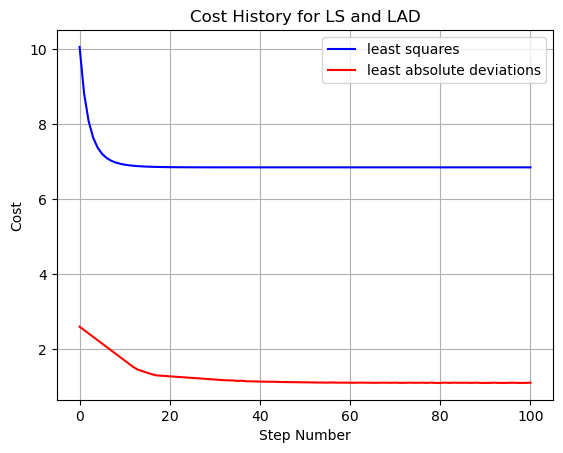

In [36]:
# use gradient descent to learn two linear models : least squares and least absolute deviations
weight_history1, cost_history1 = gradient_descent(g=least_squares, alpha=.1, max_its=100, w=np.array([1.0, 1.0]), x=x, y=y)
weight_history2, cost_history2 = gradient_descent(g=least_absolute_deviations, alpha=.1, max_its=100, w=np.array([1.0, 1.0]), x=x, y=y)

# plot both runs
plt.plot(range(len(cost_history1)), cost_history1, color="blue", label="least squares")
plt.plot(range(len(cost_history2)), cost_history2, color="red", label="least absolute deviations")
plt.xlabel("Step Number")
plt.ylabel("Cost")
plt.title("Cost History for LS and LAD")
plt.legend()
plt.grid()
plt.show()

Q8) **[Part 2]**

 Use the learned weights from above to plot the two learned lines (use same colors as above). You can use the linspace method again to generate a list of xs that you can use. On the same figure, also plot the scatter plot from Q6. Which of these lines look like a better fit to you?


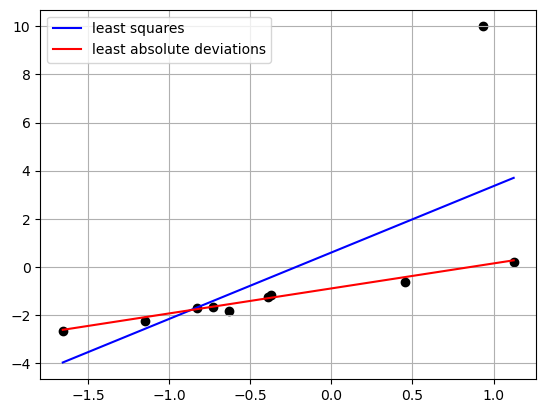

In [37]:
# use learned weights to plot learned line
s = np.linspace(np.min(x),np.max(x)) # generate xs
ys1 = model(s, weight_history1[-1]) # generate ys for each model
ys2 = model(s, weight_history2[-1])

plt.scatter(x, y, color="black")
plt.plot(s, ys1, color='blue', label="least squares")
plt.plot(s, ys2, color='red', label="least absolute deviations")
plt.legend()
plt.grid()
plt.show()

**The least absolute deviations looks like a better fit for this data, as the distance from most of the points is closest to the red line.**

Q9) **[10 points]**

[Part 1] Implement the mean squared error (MSE) and the mean absolute deviation functions from class. The functions should take in as input an array of actual ys and an array of predicted ys and return the prediction error.

In [38]:
# Implement MSE function
def MSE(y_actual, y_pred):
    error = np.mean(np.square(y_actual - y_pred))
    return error

# Implement MAD function
def MAD(y_actual, y_pred):
    error = np.mean(np.abs(y_actual - y_pred))
    return error

Q9) [Part 2]
Use the functions above to report the MSE and MAD for the two models learned in Q8 [Part 1], using the x and y from Q6. You should have 4 values total, two for each model. Which model is doing better? (Note that since you are evaluating the model on the training data, this corresponds to the training error)

In [39]:
# Report the MSE and MAD for two learned models (least-squares and least absolute deviations)
MSE_LS = MSE(y, model(x, weight_history1[-1]))
MAD_LS = MAD(y, model(x, weight_history1[-1]))

MSE_LAD = MSE(y, model(x, weight_history2[-1]))
MAD_LAD = MAD(y, model(x, weight_history2[-1]))

print(f"MSE for least squares: {MSE_LS}")
print(f"MAD for least squares: {MAD_LS}")
print(f"MSE for least absolute deviations: {MSE_LAD}")
print(f"MAD for least absolute deviations: {MAD_LAD}")

MSE for least squares: 6.841394300667753
MAD for least squares: 1.68937055338514
MSE for least absolute deviations: 9.866874898545982
MAD for least absolute deviations: 1.09670195220381


**The MSE value is lowest for model 1 (least-squares) because it was trained using the least squares function, and the MAD is lowest for model 2 (least absolute deviations) because it was trained on the least absolute deviations function.**

Q10) **[6 points]**

 Implement the L1 and L2 regularizers from class. Recall the regularizers take in input the weight vector and return a score based on the L1 or L2 norm of the weights

In [40]:
# Implement L1 and L2 regulizers
def L2_regularizer(w):
    L2 = np.sum(np.square(w)) # quadratic penalty: ridge
    return L2

def L1_regularizer(w):
    L1 = np.sum(np.abs(w)) # linear penalty: lasso
    return L1

Q11) **[12 points]**

Turn the least squares function implemented in Q2 into the Ridge (L2) and Lasso (L1) least squares (covered in class) using the functions implemented in Q10. Recall that $\lambda$ is used as a hyperparameter to specify the smoothness of the function learned (higher $\lambda$ leads to simpler and smoother functions whereas lower $\lambda$ leads to better fitting to the data. $\lambda=0$ is the same as non-regularized least-squares)

In [51]:
# Turn the least squares function into Ridge (L2)
def ridge(w,x,y,lmbda):
    cost = least_squares(w, x, y) + lmbda * L2_regularizer(w)
    return cost


# Turn the least squares function into Lasso (L1)
def lasso(w,x,y,lmbda):
    cost = least_squares(w, x, y) + lmbda * L1_regularizer(w)
    return cost


# update gradient descent function that also takes lamda hyperparameter
def gradient_descent(g, alpha, max_its, w, x, y, lmbda):
    gradient = grad(g)   # use the autograd library to find the gradient of a function
    
    weight_history = [w] # list to store weights
    cost_history  = [g(w, x, y, lmbda)] # list to store costs

    for k in range(max_its):
        grad_w = gradient(w, x, y, lmbda) # compute gradient

        w = w - alpha * grad_w

        cost = g(w, x, y, lmbda) # compute cost
        
        # Store history
        weight_history.append(w)
        cost_history.append(cost)
        
    return weight_history,cost_history

## For the remaining questions we will work with `weatherHistory.csv` dataset

The file 'weatherHistory.csv'has 96,454 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns. Read the data file. Note that the first line is the header describing each column.

In [68]:
# read csv file in as a pandas df
data = pd.read_csv("weatherHistory.csv")
print(data.head())

                            Date        Summary Precip  Temperature  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy   rain     9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy   rain     9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy   rain     9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy   rain     8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy   rain     8.755556   

   Apparent_Temperature  Humidity  Wind_Speed  Wind_Bearing  Visibility  \
0              7.388889      0.89     14.1197         251.0     15.8263   
1              7.227778      0.86     14.2646         259.0     15.8263   
2              9.377778      0.89      3.9284         204.0     14.9569   
3              5.944444      0.83     14.1036         269.0     15.8263   
4              6.977778      0.83     11.0446         259.0     15.8263   

   Loud_Cover  Pressure                      Daily_Summary  
0         0.0   1015.13  Partly cloudy throughout the day.  


 Use the data above to set y to be the temperatures and X to be the following columns (in order): [Apparent_Temperature, Humidity, Wind_Speed, Wind_Bearing, Visibility, Pressure] Basically, we want to see whether we can predict the temperature, using the features in X.

In [74]:
# set y to be temperature and X to be [Apparent_Temperature, Humidity, Wind_Speed, Wind_Bearing, Visibility, Pressure]
y = data["Temperature"]
X = data[["Apparent_Temperature", "Humidity", "Wind_Speed", "Wind_Bearing", "Visibility", "Pressure"]]

print(y.head())
print(X.head())

0    9.472222
1    9.355556
2    9.377778
3    8.288889
4    8.755556
Name: Temperature, dtype: float64
   Apparent_Temperature  Humidity  Wind_Speed  Wind_Bearing  Visibility  \
0              7.388889      0.89     14.1197         251.0     15.8263   
1              7.227778      0.86     14.2646         259.0     15.8263   
2              9.377778      0.89      3.9284         204.0     14.9569   
3              5.944444      0.83     14.1036         269.0     15.8263   
4              6.977778      0.83     11.0446         259.0     15.8263   

   Pressure  
0   1015.13  
1   1015.63  
2   1015.94  
3   1016.41  
4   1016.51  


We are now going to using a well-known ML library called sklearn. If you do not have it installed, please do so using this instruction: https://scikit-learn.org/stable/install.html

sklearn comes with many models already implemented, below we import the standard linear regression, Ridge, and Lasso models from sklearn. We also import a method that can divide our data into train/test sets. Please run the cell below.

In [80]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

This library is very easy to use. We briefly went over it in the class but please use the API and user guide  ( https://scikit-learn.org) to learn exactly how to use this library.

For instance, learning a linear regression model using sklearn can be done in two lines:

linearModel = LinearRegression()

linearModel.fit(x_train, y_train)

Use the train_test_split to divide your modified data into 80% train, 20% test.

In [79]:
# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

Q12) **[8 points]**

Use sklearn to train a LinearRegression model using the data above. Report the performance of the model on the test data (use sklearn's MSE implementation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html). Note that the .predict method can be used to get the y_predictions for the test xs.

In [92]:
# Initialize and train linear regression model
linearModel = LinearRegression()
linearModel.fit(X_train, y_train)

# Make predictions
y_pred = linearModel.predict(X_test)

# Check and report performance
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")

Linear Regression MSE: 0.8884235236673778


Q13) **[7 points]**

Repeat Q12 but instead of LinearRegression, use the Ridge and Lasso functions. You can keep the default alpha (note that what we called lambda in the class, the hyperparameter for regularization, is called alpha in sklearn. It is the same thing).

Print the learned parameters for the Ridge and Lasso models (using .coef_). Note that the parameters below correspond to the feature vector ( [Apparent_Temperature, Humidity, Wind_Speed, Wind_Bearing, Visibility, Pressure]), in order. I.e., the first value corresponds to "Apparent_Temperature", etc. What is the difference between the ridge and lasso parameters? Which features, if any, have been eliminated by lasso?

In [93]:
# Initialize and train ridge regression model
ridgeModel = Ridge()
ridgeModel.fit(X_train, y_train)

print("Ridge coefficients:", ridgeModel.coef_)

# Make predictions
y_pred = ridgeModel.predict(X_test)

# Check and report performance
mse = mean_squared_error(y_test, y_pred)
print(f"Ridge MSE: {mse} \n")


# Initialize and train lasso regression model
lassoModel = Lasso()
lassoModel.fit(X_train, y_train)

print("Lasso coefficients:", lassoModel.coef_)

# Make predictions
y_pred = lassoModel.predict(X_test)

# Check and report performance
mse = mean_squared_error(y_test, y_pred)
print(f"Lasso MSE: {mse}")

Ridge coefficients: [ 8.72688748e-01 -1.42187837e+00  7.99719003e-02 -3.78797201e-04
  9.02230564e-03 -2.01688458e-04]
Ridge MSE: 0.8884237183327345 

Lasso coefficients: [ 8.80513216e-01 -0.00000000e+00  6.91543581e-02 -2.28229288e-04
  0.00000000e+00 -1.50252146e-04]
Lasso MSE: 0.9609032578776662


**The difference between the ridge and lasso parameters is that lasso model eliminates two features, but the ridge model does not. In other words, none of the ridge parameters are 0, while the Lasso model eliminated the Humidity feature and the Visability feature, so both of these parameters are 0. This is because the L1 regulizer is likely to make the weights for irrelevant input features equal to 0.**